## Import relevant libraries

In [50]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:
print("The current working directory is: ",
       os.getcwd()
     )


The current working directory is:  c:\Users\30697\Desktop\Jobs\Job Descriptions\ML_assignment_2025


In [52]:
energy = pd.read_excel("energy_data.xlsx")

### Prepare CO2 factor Vector Y 1x168 to forecast

In [53]:
# Create a dict of all lagged columns
future_targets = {
    f'CO2factor_t+{i}': energy['CO2factor'].shift(-i)
    for i in range(1, 168)
}

# Concatenate the lagged columns into a dataframe
lagged_df = pd.concat(future_targets.values(), axis=1)

lagged_df.columns = future_targets.keys() # columns names

print(lagged_df.head())

   CO2factor_t+1  CO2factor_t+2  CO2factor_t+3  CO2factor_t+4  CO2factor_t+5  \
0       0.358140       0.349210       0.339635       0.330915       0.332042   
1       0.349210       0.339635       0.330915       0.332042       0.330217   
2       0.339635       0.330915       0.332042       0.330217       0.334135   
3       0.330915       0.332042       0.330217       0.334135       0.342233   
4       0.332042       0.330217       0.334135       0.342233       0.344718   

   CO2factor_t+6  CO2factor_t+7  CO2factor_t+8  CO2factor_t+9  CO2factor_t+10  \
0       0.330217       0.334135       0.342233       0.344718        0.337523   
1       0.334135       0.342233       0.344718       0.337523        0.321490   
2       0.342233       0.344718       0.337523       0.321490        0.308863   
3       0.344718       0.337523       0.321490       0.308863        0.308198   
4       0.337523       0.321490       0.308863       0.308198        0.322652   

   ...  CO2factor_t+158  CO2fact

In [54]:
# merge with main dataset
energy = pd.concat([energy, lagged_df], axis=1)

energy.head()

,starting_time,CO2factor,solar,landwind,seawind,biomass,CO2factor_t+1,CO2factor_t+2,CO2factor_t+3,CO2factor_t+4,...,CO2factor_t+158,CO2factor_t+159,CO2factor_t+160,CO2factor_t+161,CO2factor_t+162,CO2factor_t+163,CO2factor_t+164,CO2factor_t+165,CO2factor_t+166,CO2factor_t+167
0,2020-12-31 23:00:00,0.361425,0,82894,256749,662593,0.358140,0.349210,0.339635,0.330915,...,0.326481,0.332229,0.337505,0.338211,0.335457,0.341005,0.343848,0.344395,0.350098,0.349443
1,2021-01-01 00:00:00,0.358140,0,95906,325500,675321,0.349210,0.339635,0.330915,0.332042,...,0.332229,0.337505,0.338211,0.335457,0.341005,0.343848,0.344395,0.350098,0.349443,0.354466
2,2021-01-01 01:00:00,0.349210,0,122117,332500,588699,0.339635,0.330915,0.332042,0.330217,...,0.337505,0.338211,0.335457,0.341005,0.343848,0.344395,0.350098,0.349443,0.354466,0.353488
3,2021-01-01 02:00:00,0.339635,0,87353,322749,487599,0.330915,0.332042,0.330217,0.334135,...,0.338211,0.335457,0.341005,0.343848,0.344395,0.350098,0.349443,0.354466,0.353488,0.354207
4,2021-01-01 03:00:00,0.330915,0,59687,351750,392943,0.332042,0.330217,0.334135,0.342233,...,0.335457,0.341005,0.343848,0.344395,0.350098,0.349443,0.354466,0.353488,0.354207,0.358786


In [83]:
energy.tail()

,starting_time,CO2factor,solar,landwind,seawind,biomass,CO2factor_t+1,CO2factor_t+2,CO2factor_t+3,CO2factor_t+4,...,day_4,day_5,day_6,season_sin,season_cos,hour_sin,hour_cos,day_of_week,day_sin,day_cos
34892,2024-12-24 19:00:00,0.340739,0,1222311,708250,630498,0.336111,0.336335,0.328698,0.314209,...,0,0,0,0.0,1.0,-0.965926,0.258819,1,0.781831,0.62349
34893,2024-12-24 20:00:00,0.336111,0,1141922,737000,630556,0.336335,0.328698,0.314209,0.314782,...,0,0,0,0.0,1.0,-0.866025,0.500000,1,0.781831,0.62349
34894,2024-12-24 21:00:00,0.336335,0,925193,852749,631026,0.328698,0.314209,0.314782,0.318357,...,0,0,0,0.0,1.0,-0.707107,0.707107,1,0.781831,0.62349
34895,2024-12-24 22:00:00,0.328698,0,883119,953749,602393,0.314209,0.314782,0.318357,0.316893,...,0,0,0,0.0,1.0,-0.500000,0.866025,1,0.781831,0.62349
34896,2024-12-24 23:00:00,0.314209,0,804724,952750,477265,0.314782,0.318357,0.316893,0.314499,...,0,0,0,0.0,1.0,-0.258819,0.965926,1,0.781831,0.62349


In [55]:
# we need to drop the last 167 rows due to NaN values in the lagged columns
energy = energy.dropna()  # drop rows with NaN value

## Simple Random Forest model

In [56]:
# import sklearn modules 

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit


In [57]:
from sklearn.ensemble import RandomForestRegressor 

## Indicators

In [58]:
energy['hour'] = energy['starting_time'].dt.hour # extract hours from starting_time

hour_dummies = pd.get_dummies(energy['hour'], prefix='hour', drop_first=False).astype(int) # create indicator variables for hours


energy = pd.concat([energy, hour_dummies], axis=1) # merge with original dataset

In [59]:
# Extract month
energy['month'] = energy['starting_time'].dt.month

# Map months to seasons
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

energy['season'] = energy['month'].apply(get_season) # apply the function to the month column to get season column


season_dummies = pd.get_dummies(energy['season'], prefix='season', drop_first=False).astype(int) # create season indicators

# Add to main DataFrame
energy = pd.concat([energy, season_dummies], axis=1)

In [60]:
energy['dayofweek'] = energy['starting_time'].dt.dayofweek

day_dummies = pd.get_dummies(energy['dayofweek'], prefix='day', drop_first=True) # get indicators for each day of the week besides 1 for dummy trap (Monday is dropped)
 
day_dummies = day_dummies.astype(int) # change booleans to binary

energy = pd.concat([energy, day_dummies], axis=1) # add to main dataframe

# Random Forests Models


### all features included ->  (Attention!: Takes 2min to run in my computer)

In [12]:

base_features = ["solar", "landwind", "seawind", "biomass"] # main 4 features


hour_features = [col for col in energy.columns if col.startswith('hour_') and col != 'hour_0'] # indicators for each hour of the day, avoid dummy trap

season_features = [col for col in energy.columns if col.startswith('season_') and col != 'season_Winter'] # 4 indicators for each season, avoid dummy trap

day_features = list(day_dummies.columns)  # indicators for each day of the week, avoid dummy trap

indicator_features = hour_features + season_features + day_features # all indicators

all_features = base_features + indicator_features # merge main 4 features with hour indicators


X = energy[all_features] # get X predictor matrix


Y = energy[['CO2factor'] + [f'CO2factor_t+{i}' for i in range(1, 168)]]

# train, test split chronologically due to time series nature of the data

split_index = int(len(X) * 0.8) # compute the index where split occurs
X_train, X_test = X[:split_index], X[split_index:]  # split the features
Y_train, Y_test = Y[:split_index], Y[split_index:]  # split the response




# scale the main 4 features and keep indicators as they are
preprocessor = ColumnTransformer(
    transformers=[
        ('base_features', StandardScaler(), base_features),
        ('passthrough', 'passthrough', indicator_features)
      ]  
)

# pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(
        RandomForestRegressor(
            n_estimators=30, # number of trees in the forest
            max_depth=10, #  tree depth
            random_state=42, # reproducibility
            n_jobs=-1  # use all cores of the computer
        )
    ))
])


pipeline.fit(X_train, Y_train)  # fit the model

# predict
Y_pred = pipeline.predict(X_test)

In [13]:
Y_pred = pd.DataFrame(Y_pred, columns=Y_test.columns, index=Y_test.index) # convert to DataFrame with same index and columns as Y_test

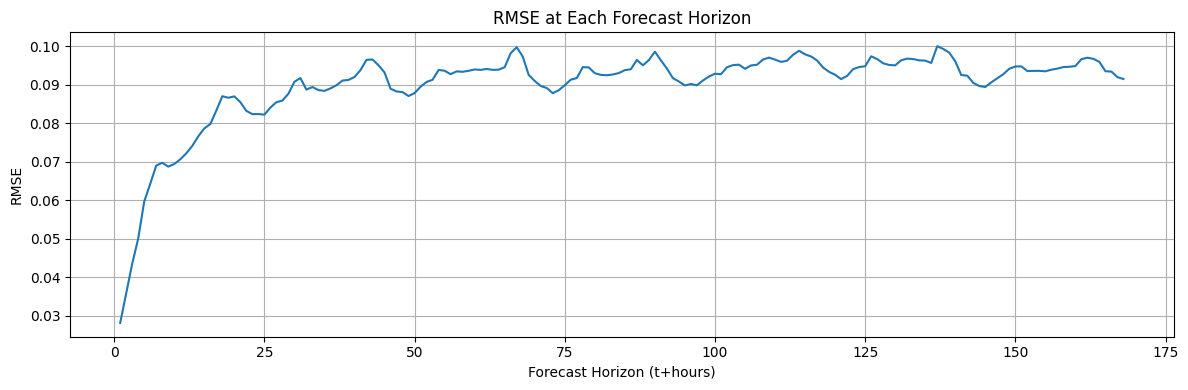

In [14]:
rmse_per_horizon = np.sqrt(((Y_pred - Y_test) ** 2).mean(axis=0))

plt.figure(figsize=(12, 4))
plt.plot(range(1, 169), rmse_per_horizon)
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('RMSE')
plt.title('RMSE at Each Forecast Horizon')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0)

# RMSE per forecast step
average_rmse = np.mean(rmse_per_horizon)

# MAE per forecast step
mae_per_horizon = (Y_pred - Y_test).abs().mean(axis=0) # MAE per forecast step
average_mae = mae_per_horizon.mean() # average MAE over all forecast steps

# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0) # R² per forecast step
average_r2 = r2_per_horizon.mean() # avcverage R² over all forecast steps


print(f"Average RMSE over 168 forecast steps: {average_rmse:.4f}")

print(f"Average MAE over 168 forecast steps: {average_mae:.4f}")

print(f"Average R² over 168 forecast steps: {average_r2:.4f}")

Average RMSE over 168 forecast steps: 0.0900
Average MAE over 168 forecast steps: 0.0747
Average R² over 168 forecast steps: 0.3279


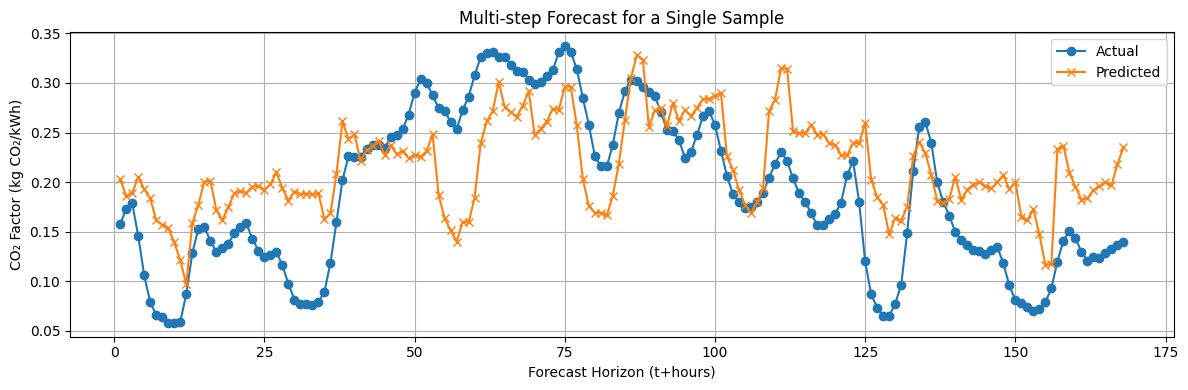

In [16]:
idx = 0  # First test sample

# Get actual and predicted values directly as Series
actual = Y_test.iloc[idx]
predicted = Y_pred.iloc[idx]  # No need to wrap; it's already a Series

# Plot
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(actual) + 1), actual, label='Actual', marker='o')
plt.plot(range(1, len(predicted) + 1), predicted, label='Predicted', marker='x')
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('CO₂ Factor (kg CO₂/kWh)')
plt.title('Multi-step Forecast for a Single Sample')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


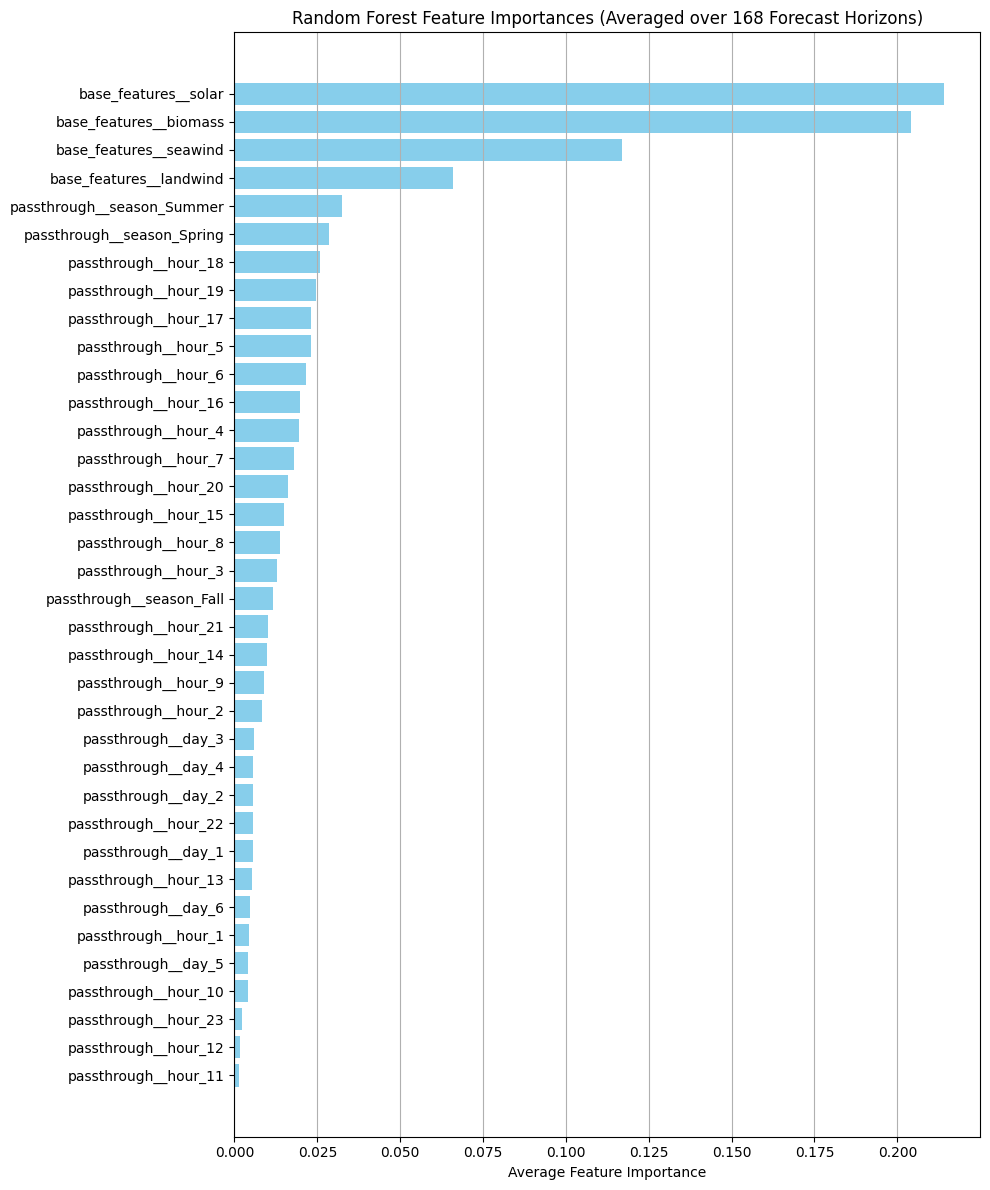

In [18]:
# feature importance insights

# feature names
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# access the fitted multi-output regressor
rf_model = pipeline.named_steps['regressor']

# access individual RandomForest models for each output
importances_list = [est.feature_importances_ for est in rf_model.estimators_]

# Stack into a DataFrame: shape (n_outputs, n_features)
importances_df = pd.DataFrame(importances_list, columns=feature_names)

# Average importances across all forecast horizons (t+1 to t+167)
avg_importance = importances_df.mean(axis=0).sort_values(ascending=True)  # ascending for horizontal bar plot

# Plot
plt.figure(figsize=(10, 12))
plt.barh(avg_importance.index, avg_importance.values, color='skyblue')
plt.xlabel("Average Feature Importance")
plt.title("Random Forest Feature Importances (Averaged over 168 Forecast Horizons)")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## No Days Indicators


In [19]:

base_features = ["solar", "landwind", "seawind", "biomass"] # main 4 features


hour_features = [col for col in energy.columns if col.startswith('hour_') and col != 'hour_0'] # indicators for each hour of the day, avoid dummy trap

season_features = [col for col in energy.columns if col.startswith('season_') and col != 'season_Winter'] # 4 indicators for each season, avoid dummy trap


indicator_features = hour_features + season_features # all indicators

all_features = base_features + indicator_features # merge main 4 features with hour indicators


X = energy[all_features] # get X predictor matrix


Y = energy[['CO2factor'] + [f'CO2factor_t+{i}' for i in range(1, 168)]]

# train, test split chronologically due to time series nature of the data

split_index = int(len(X) * 0.8) # compute the index where split occurs
X_train, X_test = X[:split_index], X[split_index:]  # split the features
Y_train, Y_test = Y[:split_index], Y[split_index:]  # split the response




# scale the main 4 features and keep indicators as they are
preprocessor = ColumnTransformer(
    transformers=[
        ('base_features', StandardScaler(), base_features),
        ('passthrough', 'passthrough', indicator_features)
      ]  
)

# pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(
        RandomForestRegressor(
            n_estimators=30, # number of trees in the forest
            max_depth=10, # unlimited tree depth
            random_state=42, # reproducibility
            n_jobs=-1  # use all cores of the computer
        )
    ))
])


pipeline.fit(X_train, Y_train)  # fit the model

# predict
Y_pred = pipeline.predict(X_test)

In [20]:
Y_pred = pd.DataFrame(Y_pred, columns=Y_test.columns, index=Y_test.index) # convert to DataFrame with same index and columns as Y_test

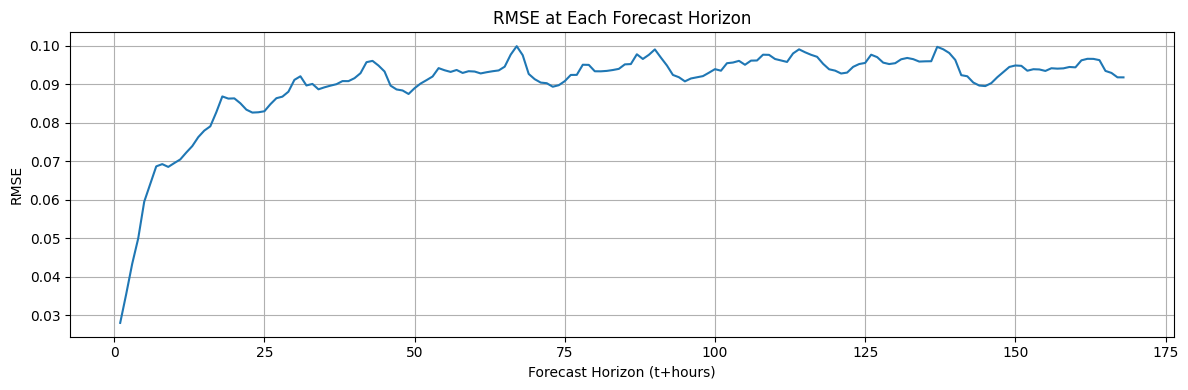

In [21]:
rmse_per_horizon = np.sqrt(((Y_pred - Y_test) ** 2).mean(axis=0))

plt.figure(figsize=(12, 4))
plt.plot(range(1, 169), rmse_per_horizon)
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('RMSE')
plt.title('RMSE at Each Forecast Horizon')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0)

# RMSE per forecast step
average_rmse = np.mean(rmse_per_horizon)

# MAE per forecast step
mae_per_horizon = (Y_pred - Y_test).abs().mean(axis=0) # MAE per forecast step
average_mae = mae_per_horizon.mean() # average MAE over all forecast steps

# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0) # R² per forecast step
average_r2 = r2_per_horizon.mean() # avcverage R² over all forecast steps


print(f"Average RMSE over 168 forecast steps: {average_rmse:.4f}")

print(f"Average MAE over 168 forecast steps: {average_mae:.4f}")

print(f"Average R² over 168 forecast steps: {average_r2:.4f}")

Average RMSE over 168 forecast steps: 0.0903
Average MAE over 168 forecast steps: 0.0750
Average R² over 168 forecast steps: 0.3232


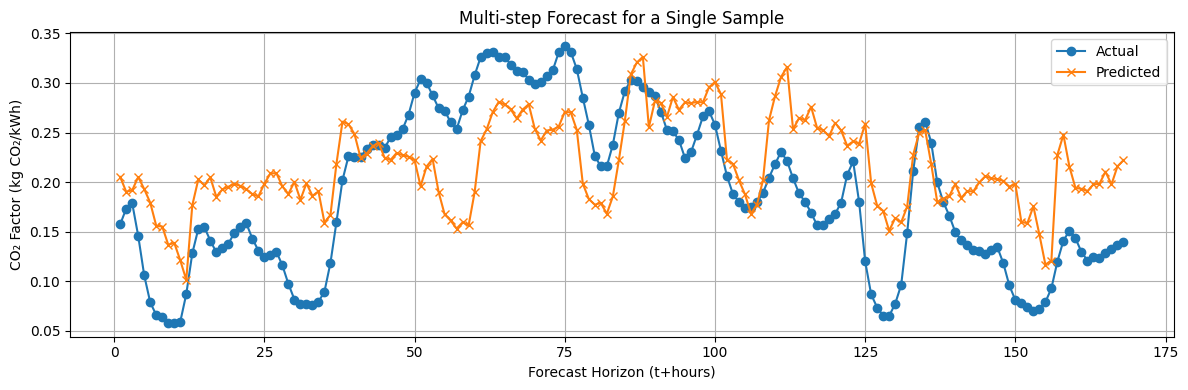

In [23]:
idx = 0  # First test sample

# Get actual and predicted values directly as Series
actual = Y_test.iloc[idx]
predicted = Y_pred.iloc[idx]  # No need to wrap; it's already a Series

# Plot
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(actual) + 1), actual, label='Actual', marker='o')
plt.plot(range(1, len(predicted) + 1), predicted, label='Predicted', marker='x')
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('CO₂ Factor (kg CO₂/kWh)')
plt.title('Multi-step Forecast for a Single Sample')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


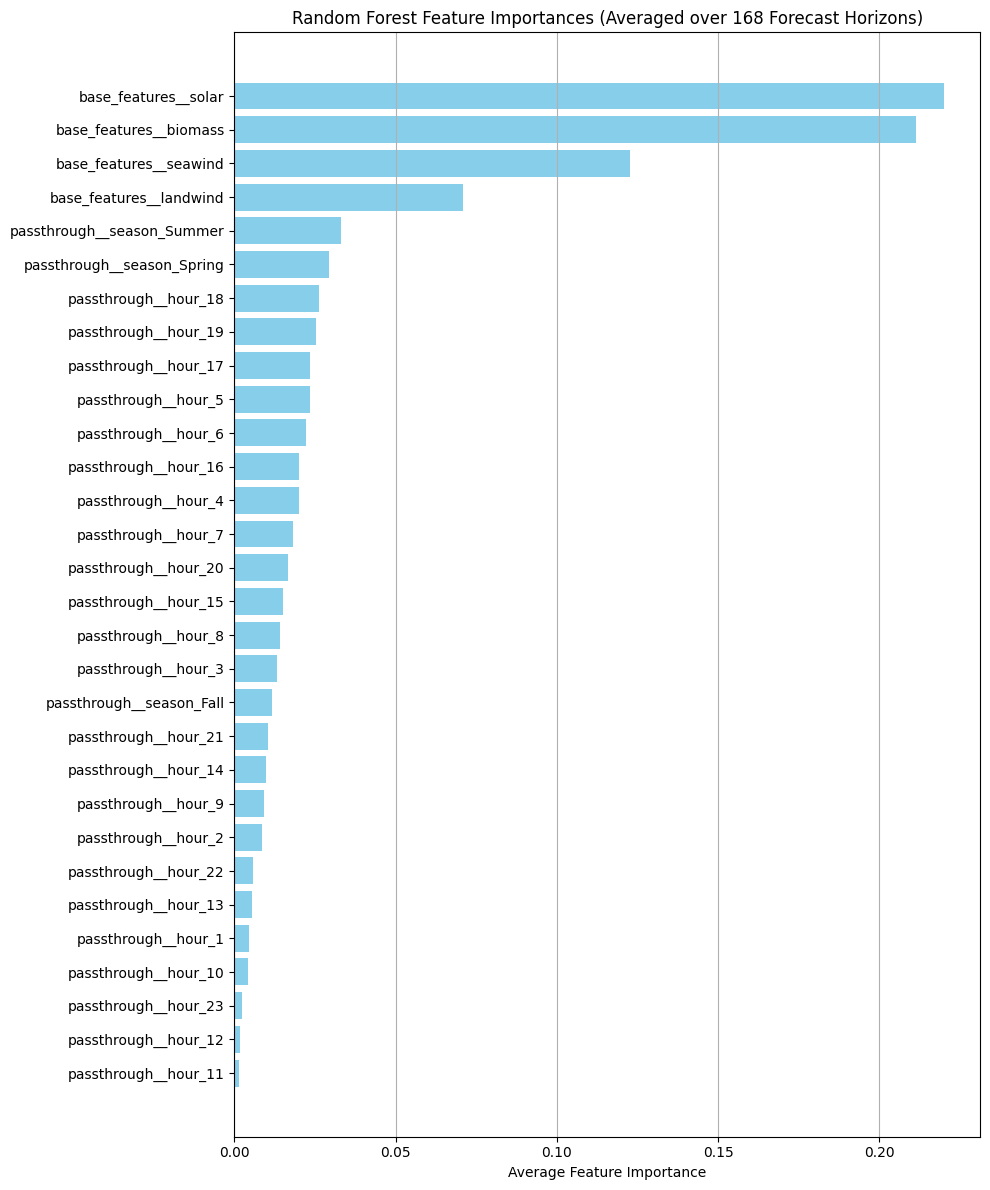

In [25]:
# feature importance insights

# feature names
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# access the fitted multi-output regressor
rf_model = pipeline.named_steps['regressor']

# access individual RandomForest models for each output
importances_list = [est.feature_importances_ for est in rf_model.estimators_]

# Stack into a DataFrame: shape (n_outputs, n_features)
importances_df = pd.DataFrame(importances_list, columns=feature_names)

# Average importances across all forecast horizons (t+1 to t+167)
avg_importance = importances_df.mean(axis=0).sort_values(ascending=True)  # ascending for horizontal bar plot

# Plot
plt.figure(figsize=(10, 12))
plt.barh(avg_importance.index, avg_importance.values, color='skyblue')
plt.xlabel("Average Feature Importance")
plt.title("Random Forest Feature Importances (Averaged over 168 Forecast Horizons)")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

### No Indicators included

In [26]:
base_features = ["solar", "landwind", "seawind", "biomass"] # main 4 features



all_features = base_features  # merge main 4 features with hour indicators


X = energy[all_features] # get X predictor matrix


Y = energy[['CO2factor'] + [f'CO2factor_t+{i}' for i in range(1, 168)]]

# train, test split chronologically due to time series nature of the data

split_index = int(len(X) * 0.8) # compute the index where split occurs
X_train, X_test = X[:split_index], X[split_index:]  # split the features
Y_train, Y_test = Y[:split_index], Y[split_index:]  # split the response




# scale the main 4 features and keep indicators as they are
preprocessor = ColumnTransformer(
    transformers=[
        ('base_features', StandardScaler(), base_features)
      ]  
)

# pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(
        RandomForestRegressor(
            n_estimators=30, # number of trees in the forest
            max_depth=10, # depth of each tree
            random_state=42, # reproducibility
            n_jobs=-1  # use all cores of the computer
        )
    ))
])


pipeline.fit(X_train, Y_train)  # fit the model

# predict
Y_pred = pipeline.predict(X_test)

In [27]:
Y_pred = pd.DataFrame(Y_pred, columns=Y_test.columns, index=Y_test.index) # convert to DataFrame with same index and columns as Y_test

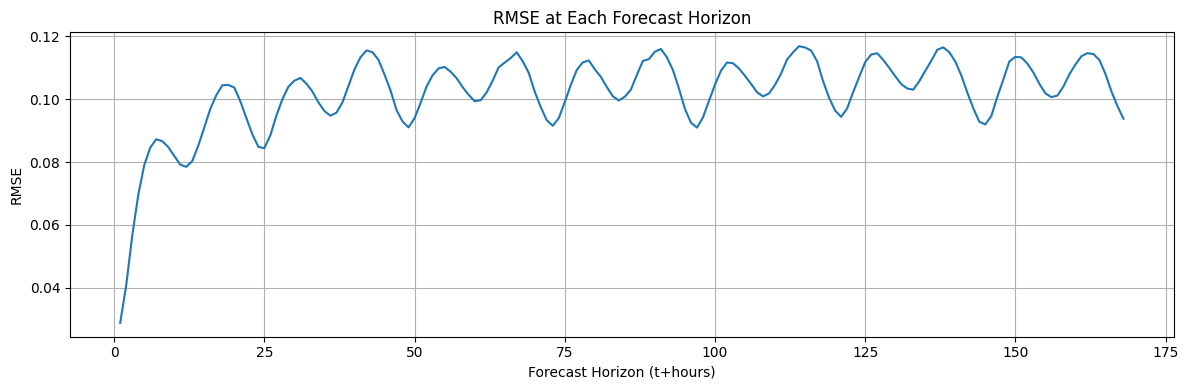

In [28]:
rmse_per_horizon = np.sqrt(((Y_pred - Y_test) ** 2).mean(axis=0))

plt.figure(figsize=(12, 4))
plt.plot(range(1, 169), rmse_per_horizon)
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('RMSE')
plt.title('RMSE at Each Forecast Horizon')
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0)

# RMSE per forecast step
average_rmse = np.mean(rmse_per_horizon)

# MAE per forecast step
mae_per_horizon = (Y_pred - Y_test).abs().mean(axis=0) # MAE per forecast step
average_mae = mae_per_horizon.mean() # average MAE over all forecast steps

# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0) # R² per forecast step
average_r2 = r2_per_horizon.mean() # avcverage R² over all forecast steps


print(f"Average RMSE over 168 forecast steps: {average_rmse:.4f}")

print(f"Average MAE over 168 forecast steps: {average_mae:.4f}")

print(f"Average R² over 168 forecast steps: {average_r2:.4f}")

Average RMSE over 168 forecast steps: 0.1020
Average MAE over 168 forecast steps: 0.0858
Average R² over 168 forecast steps: 0.1349


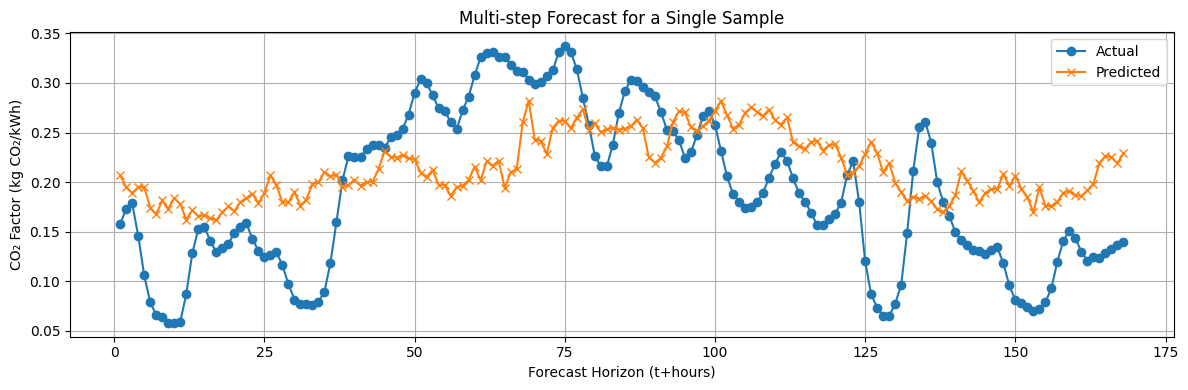

In [30]:
idx = 0  # First test sample

# Get actual and predicted values directly as Series
actual = Y_test.iloc[idx]
predicted = Y_pred.iloc[idx]  # No need to wrap; it's already a Series

# Plot
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(actual) + 1), actual, label='Actual', marker='o')
plt.plot(range(1, len(predicted) + 1), predicted, label='Predicted', marker='x')
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('CO₂ Factor (kg CO₂/kWh)')
plt.title('Multi-step Forecast for a Single Sample')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


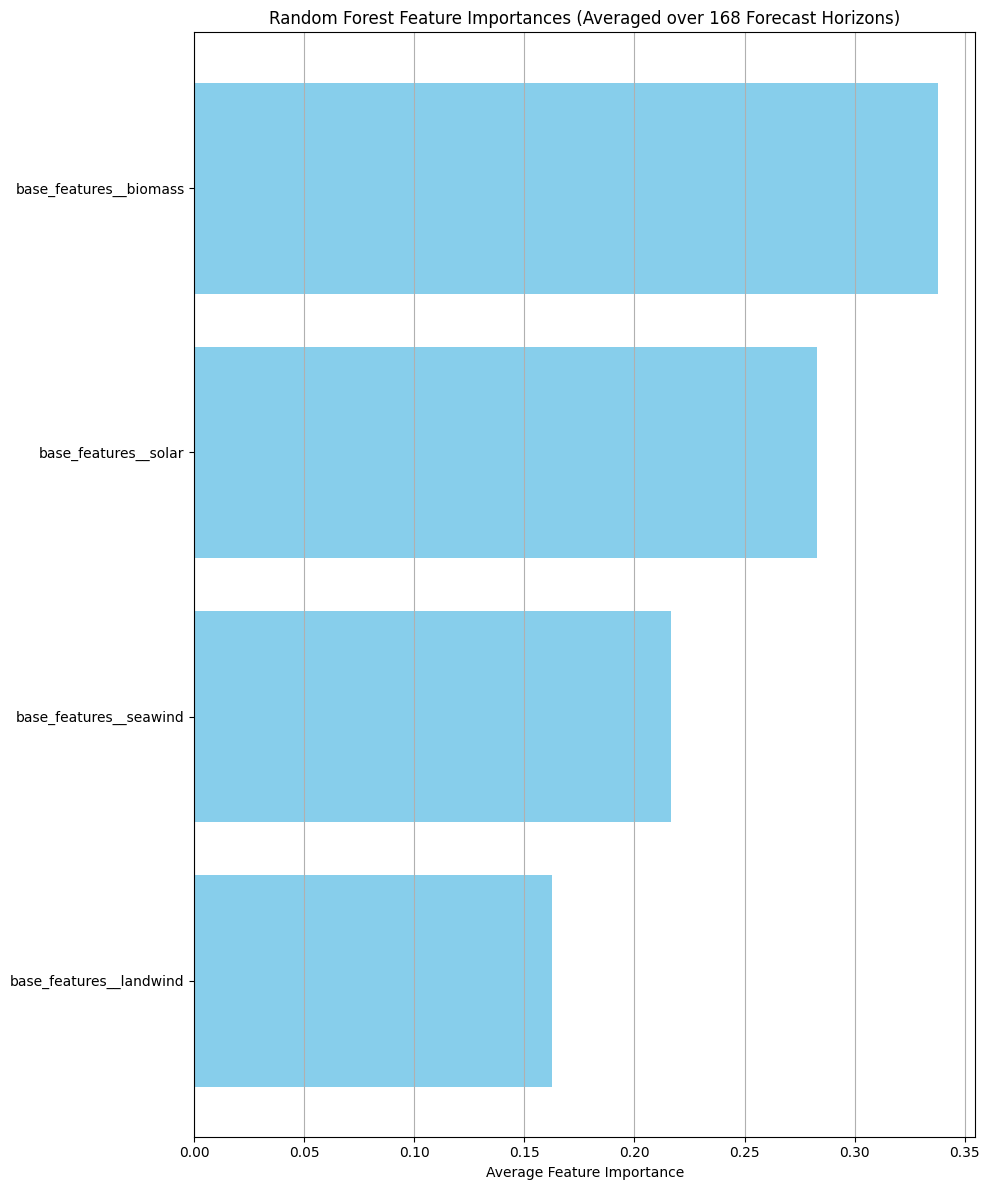

In [32]:
# feature importance insights

# feature names
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# access the fitted multi-output regressor
rf_model = pipeline.named_steps['regressor']

# access individual RandomForest models for each output
importances_list = [est.feature_importances_ for est in rf_model.estimators_]

# Stack into a DataFrame: shape (n_outputs, n_features)
importances_df = pd.DataFrame(importances_list, columns=feature_names)

# Average importances across all forecast horizons (t+1 to t+167)
avg_importance = importances_df.mean(axis=0).sort_values(ascending=True)  # ascending for horizontal bar plot

# Plot
plt.figure(figsize=(10, 12))
plt.barh(avg_importance.index, avg_importance.values, color='skyblue')
plt.xlabel("Average Feature Importance")
plt.title("Random Forest Feature Importances (Averaged over 168 Forecast Horizons)")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

### Sin/ Cosin Hours instead of Hours Indicators


In [66]:
energy['hour'] = energy['starting_time'].dt.hour
energy['hour_sin'] = np.sin(2 * np.pi * energy['hour'] / 24)
energy['hour_cos'] = np.cos(2 * np.pi * energy['hour'] / 24)

In [34]:
base_features = ["solar", "landwind", "seawind", "biomass", "hour_sin", "hour_cos"] # main 4 features




season_features = [col for col in energy.columns if col.startswith('season_') and col != 'season_Winter'] # indicators for each season, avoid dummy trap

day_features = list(day_dummies.columns)  # indicators for each day of the week, avoid dummy trap

indicator_features = season_features + day_features # all indicators

all_features = base_features + indicator_features # merge main 4 features with hour indicators


X = energy[all_features] # get X predictor matrix


Y = energy[['CO2factor'] + [f'CO2factor_t+{i}' for i in range(1, 168)]]

# train, test split chronologically due to time series nature of the data

split_index = int(len(X) * 0.8) # compute the index where split occurs
X_train, X_test = X[:split_index], X[split_index:]  # split the features
Y_train, Y_test = Y[:split_index], Y[split_index:]  # split the response




# scale the main 4 features and keep hour indicators as they are
preprocessor = ColumnTransformer(
    transformers=[
        ('base_features', StandardScaler(), base_features),
        ('passthrough', 'passthrough', indicator_features)
      ]  
)

# pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(
        RandomForestRegressor(
            n_estimators=30, # number of trees in the forest
            max_depth=10, # depth of each tree
            random_state=42, # reproducibility
            n_jobs=-1  # use all cores of the computer
        )
    ))
])


pipeline.fit(X_train, Y_train)  # fit the model

# predict
Y_pred = pipeline.predict(X_test)

In [35]:
Y_pred = pd.DataFrame(Y_pred, columns=Y_test.columns, index=Y_test.index) # convert to DataFrame with same index and columns as Y_test

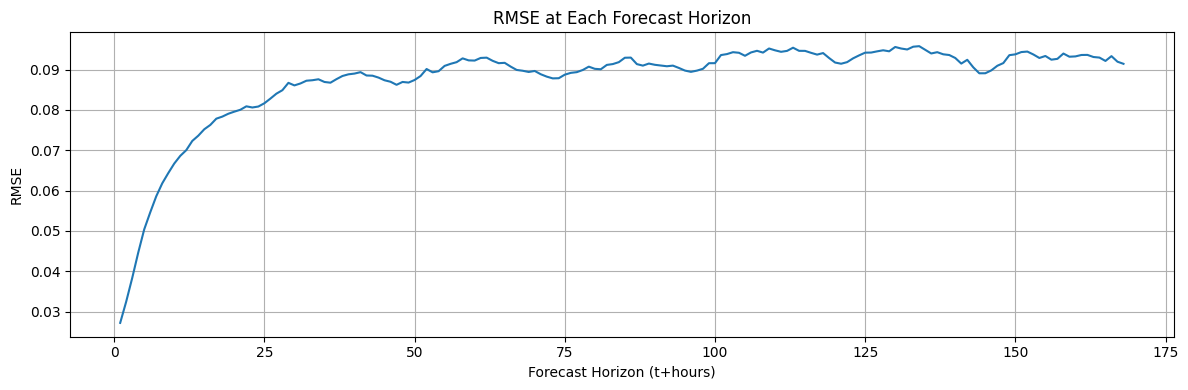

In [36]:
rmse_per_horizon = np.sqrt(((Y_pred - Y_test) ** 2).mean(axis=0))

plt.figure(figsize=(12, 4))
plt.plot(range(1, 169), rmse_per_horizon)
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('RMSE')
plt.title('RMSE at Each Forecast Horizon')
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0)

# RMSE per forecast step
average_rmse = np.mean(rmse_per_horizon)

# MAE per forecast step
mae_per_horizon = (Y_pred - Y_test).abs().mean(axis=0) # MAE per forecast step
average_mae = mae_per_horizon.mean() # average MAE over all forecast steps

# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0) # R² per forecast step
average_r2 = r2_per_horizon.mean() # avcverage R² over all forecast steps


print(f"Average RMSE over 168 forecast steps: {average_rmse:.4f}")

print(f"Average MAE over 168 forecast steps: {average_mae:.4f}")

print(f"Average R² over 168 forecast steps: {average_r2:.4f}")

Average RMSE over 168 forecast steps: 0.0876
Average MAE over 168 forecast steps: 0.0719
Average R² over 168 forecast steps: 0.3612


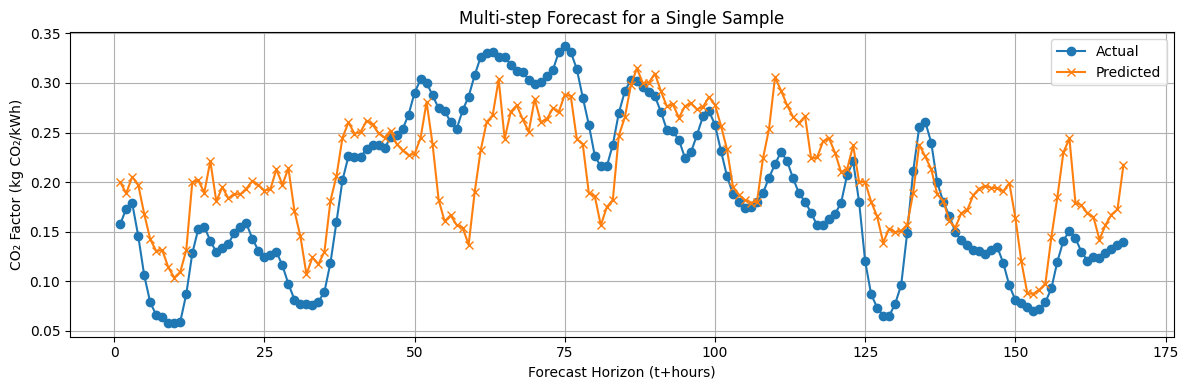

In [38]:
idx = 0  # First test sample

# Get actual and predicted values directly as Series
actual = Y_test.iloc[idx]
predicted = Y_pred.iloc[idx]  # No need to wrap; it's already a Series

# Plot
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(actual) + 1), actual, label='Actual', marker='o')
plt.plot(range(1, len(predicted) + 1), predicted, label='Predicted', marker='x')
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('CO₂ Factor (kg CO₂/kWh)')
plt.title('Multi-step Forecast for a Single Sample')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


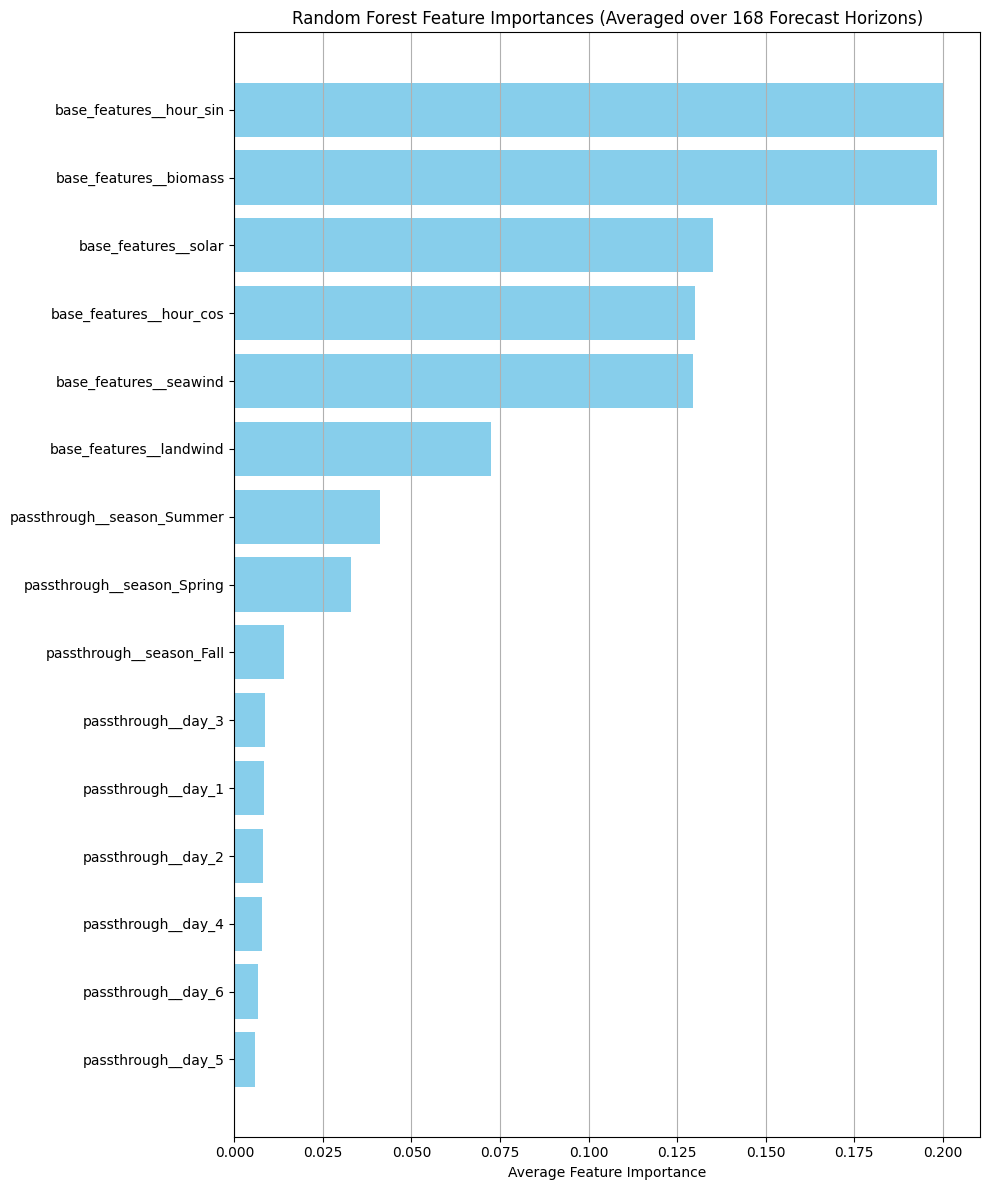

In [40]:
# feature importance insights

# feature names
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# access the fitted multi-output regressor
rf_model = pipeline.named_steps['regressor']

# access individual RandomForest models for each output
importances_list = [est.feature_importances_ for est in rf_model.estimators_]

# Stack into a DataFrame: shape (n_outputs, n_features)
importances_df = pd.DataFrame(importances_list, columns=feature_names)

# Average importances across all forecast horizons (t+1 to t+167)
avg_importance = importances_df.mean(axis=0).sort_values(ascending=True)  # ascending for horizontal bar plot

# Plot
plt.figure(figsize=(10, 12))
plt.barh(avg_importance.index, avg_importance.values, color='skyblue')
plt.xlabel("Average Feature Importance")
plt.title("Random Forest Feature Importances (Averaged over 168 Forecast Horizons)")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## Sin/Cosin Seasons instead of Seasons Indicators

In [61]:
energy.head()

,starting_time,CO2factor,solar,landwind,seawind,biomass,CO2factor_t+1,CO2factor_t+2,CO2factor_t+3,CO2factor_t+4,...,season_Spring,season_Summer,season_Winter,dayofweek,day_1,day_2,day_3,day_4,day_5,day_6
0,2020-12-31 23:00:00,0.361425,0,82894,256749,662593,0.358140,0.349210,0.339635,0.330915,...,0,0,1,3,0,0,1,0,0,0
1,2021-01-01 00:00:00,0.358140,0,95906,325500,675321,0.349210,0.339635,0.330915,0.332042,...,0,0,1,4,0,0,0,1,0,0
2,2021-01-01 01:00:00,0.349210,0,122117,332500,588699,0.339635,0.330915,0.332042,0.330217,...,0,0,1,4,0,0,0,1,0,0
3,2021-01-01 02:00:00,0.339635,0,87353,322749,487599,0.330915,0.332042,0.330217,0.334135,...,0,0,1,4,0,0,0,1,0,0
4,2021-01-01 03:00:00,0.330915,0,59687,351750,392943,0.332042,0.330217,0.334135,0.342233,...,0,0,1,4,0,0,0,1,0,0


In [62]:

season_map = {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3}
energy['season'] = energy['season'].map(season_map).astype(int)

energy['season_sin'] = np.sin(2 * np.pi * energy['season'] / 4)
energy['season_cos'] = np.cos(2 * np.pi * energy['season'] / 4)


In [67]:
base_features = ["solar", "landwind", "seawind", "biomass", "hour_sin", "hour_cos", "season_sin", "season_cos"] # main 4 features





day_features = list(day_dummies.columns)  # indicators for each day of the week, avoid dummy trap

indicator_features = day_features # all indicators

all_features = base_features + indicator_features # merge main 4 features with hour indicators


X = energy[all_features] # get X predictor matrix


Y = energy[['CO2factor'] + [f'CO2factor_t+{i}' for i in range(1, 168)]]

# train, test split chronologically due to time series nature of the data

split_index = int(len(X) * 0.8) # compute the index where split occurs
X_train, X_test = X[:split_index], X[split_index:]  # split the features
Y_train, Y_test = Y[:split_index], Y[split_index:]  # split the response




# scale the main 4 features and keep hour indicators as they are
preprocessor = ColumnTransformer(
    transformers=[
        ('base_features', StandardScaler(), base_features),
        ('passthrough', 'passthrough', indicator_features)
      ]  
)

# pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(
        RandomForestRegressor(
            n_estimators=30, # number of trees in the forest
            max_depth=10, # depth of each tree
            random_state=42, # reproducibility
            n_jobs=-1  # use all cores of the computer
        )
    ))
])


pipeline.fit(X_train, Y_train)  # fit the model

# predict
Y_pred = pipeline.predict(X_test)

In [68]:
Y_pred = pd.DataFrame(Y_pred, columns=Y_test.columns, index=Y_test.index) # convert to DataFrame with same index and columns as Y_test

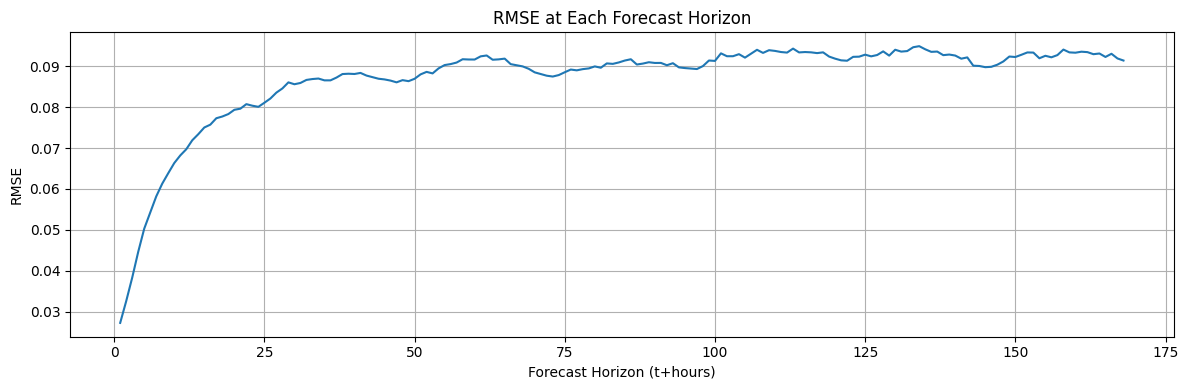

In [69]:
rmse_per_horizon = np.sqrt(((Y_pred - Y_test) ** 2).mean(axis=0))

plt.figure(figsize=(12, 4))
plt.plot(range(1, 169), rmse_per_horizon)
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('RMSE')
plt.title('RMSE at Each Forecast Horizon')
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0)

# RMSE per forecast step
average_rmse = np.mean(rmse_per_horizon)

# MAE per forecast step
mae_per_horizon = (Y_pred - Y_test).abs().mean(axis=0) # MAE per forecast step
average_mae = mae_per_horizon.mean() # average MAE over all forecast steps

# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0) # R² per forecast step
average_r2 = r2_per_horizon.mean() # avcverage R² over all forecast steps


print(f"Average RMSE over 168 forecast steps: {average_rmse:.4f}")

print(f"Average MAE over 168 forecast steps: {average_mae:.4f}")

print(f"Average R² over 168 forecast steps: {average_r2:.4f}")

Average RMSE over 168 forecast steps: 0.0870
Average MAE over 168 forecast steps: 0.0713
Average R² over 168 forecast steps: 0.3695


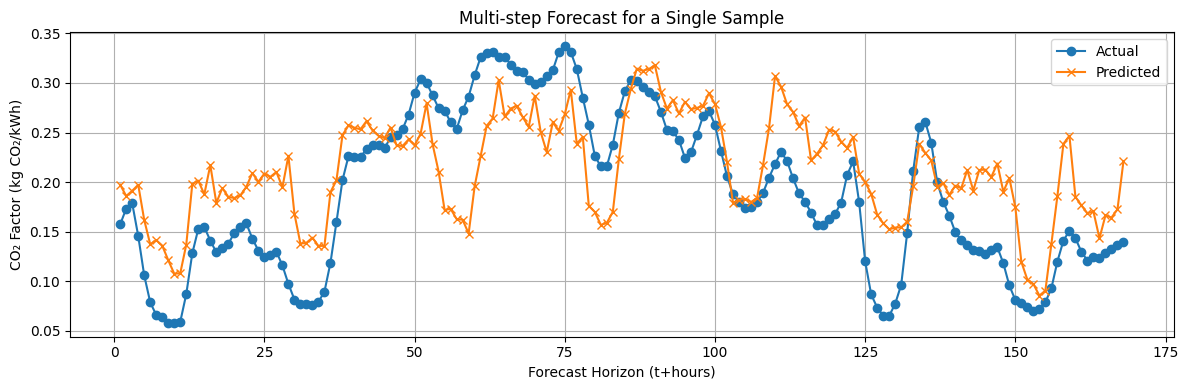

In [71]:
idx = 0  # First test sample

# Get actual and predicted values directly as Series
actual = Y_test.iloc[idx]
predicted = Y_pred.iloc[idx]  # No need to wrap; it's already a Series

# Plot
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(actual) + 1), actual, label='Actual', marker='o')
plt.plot(range(1, len(predicted) + 1), predicted, label='Predicted', marker='x')
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('CO₂ Factor (kg CO₂/kWh)')
plt.title('Multi-step Forecast for a Single Sample')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


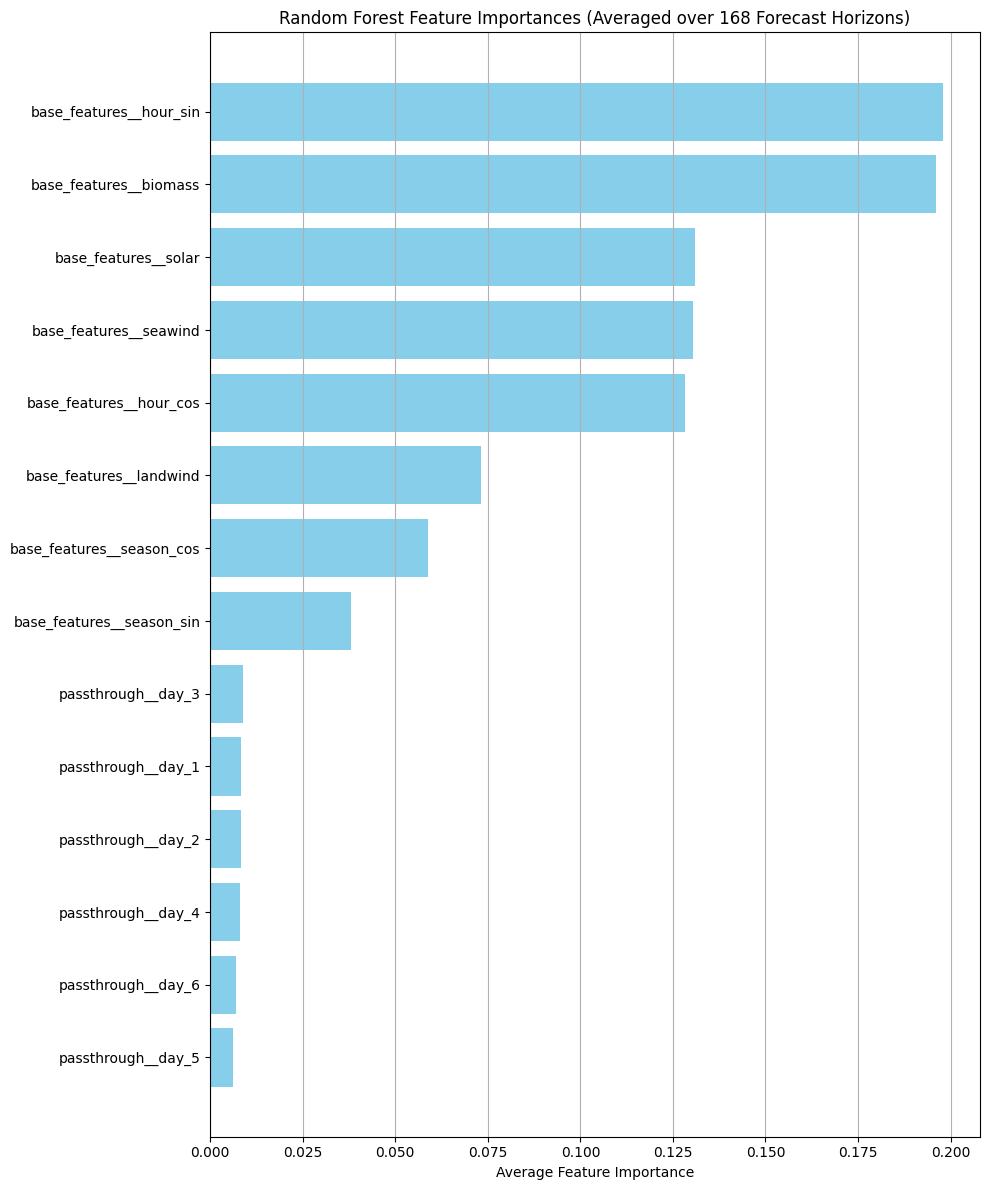

In [73]:
# feature importance insights

# feature names
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# access the fitted multi-output regressor
rf_model = pipeline.named_steps['regressor']

# access individual RandomForest models for each output
importances_list = [est.feature_importances_ for est in rf_model.estimators_]

# Stack into a DataFrame: shape (n_outputs, n_features)
importances_df = pd.DataFrame(importances_list, columns=feature_names)

# Average importances across all forecast horizons (t+1 to t+167)
avg_importance = importances_df.mean(axis=0).sort_values(ascending=True)  # ascending for horizontal bar plot

# Plot
plt.figure(figsize=(10, 12))
plt.barh(avg_importance.index, avg_importance.values, color='skyblue')
plt.xlabel("Average Feature Importance")
plt.title("Random Forest Feature Importances (Averaged over 168 Forecast Horizons)")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## Sin/Cosin Days instead of Days Indicators

In [74]:
energy['day_of_week'] = energy['starting_time'].dt.dayofweek

# Encode day of week cyclically
energy['day_sin'] = np.sin(2 * np.pi * energy['day_of_week'] / 7)
energy['day_cos'] = np.cos(2 * np.pi * energy['day_of_week'] / 7)

In [75]:
base_features = ["solar", "landwind", "seawind", "biomass", "hour_sin", "hour_cos", "season_sin", "season_cos", "day_sin", "day_cos"] # main 4 features






all_features = base_features 


X = energy[all_features] # get X predictor matrix


Y = energy[['CO2factor'] + [f'CO2factor_t+{i}' for i in range(1, 168)]]

# train, test split chronologically due to time series nature of the data

split_index = int(len(X) * 0.8) # compute the index where split occurs
X_train, X_test = X[:split_index], X[split_index:]  # split the features
Y_train, Y_test = Y[:split_index], Y[split_index:]  # split the response




# scale the main 4 features and keep hour indicators as they are
preprocessor = ColumnTransformer(
    transformers=[
        ('base_features', StandardScaler(), base_features)
      ]  
)

# pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(
        RandomForestRegressor(
            n_estimators=30, # number of trees in the forest
            max_depth=10, # depth of each tree
            random_state=42, # reproducibility
            n_jobs=-1  # use all cores of the computer
        )
    ))
])


pipeline.fit(X_train, Y_train)  # fit the model

# predict
Y_pred = pipeline.predict(X_test)

In [76]:
Y_pred = pd.DataFrame(Y_pred, columns=Y_test.columns, index=Y_test.index) # convert to DataFrame with same index and columns as Y_test

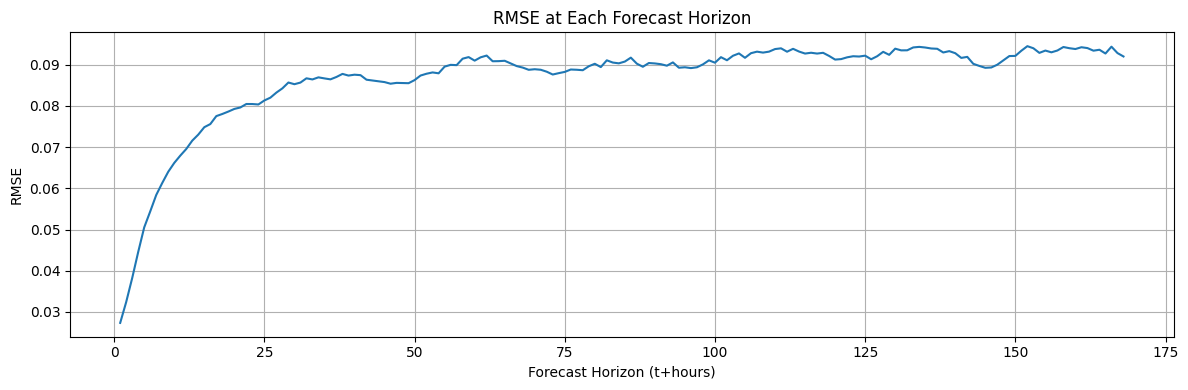

In [77]:
rmse_per_horizon = np.sqrt(((Y_pred - Y_test) ** 2).mean(axis=0))

plt.figure(figsize=(12, 4))
plt.plot(range(1, 169), rmse_per_horizon)
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('RMSE')
plt.title('RMSE at Each Forecast Horizon')
plt.grid(True)
plt.tight_layout()
plt.show()

In [78]:
# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0)

# RMSE per forecast step
average_rmse = np.mean(rmse_per_horizon)

# MAE per forecast step
mae_per_horizon = (Y_pred - Y_test).abs().mean(axis=0) # MAE per forecast step
average_mae = mae_per_horizon.mean() # average MAE over all forecast steps

# R² per forecast step
r2_per_horizon = Y_test.apply(lambda col: r2_score(col, Y_pred[col.name]), axis=0) # R² per forecast step
average_r2 = r2_per_horizon.mean() # avcverage R² over all forecast steps


print(f"Average RMSE over 168 forecast steps: {average_rmse:.4f}")

print(f"Average MAE over 168 forecast steps: {average_mae:.4f}")

print(f"Average R² over 168 forecast steps: {average_r2:.4f}")

Average RMSE over 168 forecast steps: 0.0868
Average MAE over 168 forecast steps: 0.0710
Average R² over 168 forecast steps: 0.3727


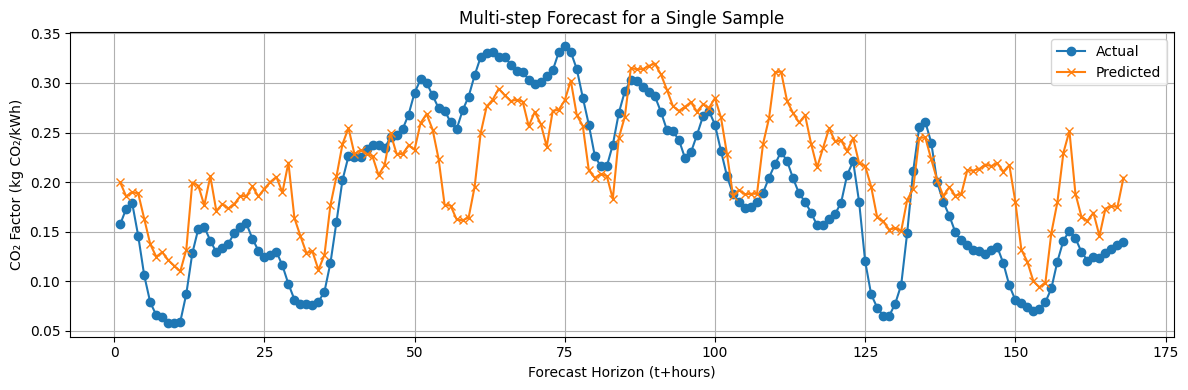

In [79]:
idx = 0  # First test sample

# Get actual and predicted values directly as Series
actual = Y_test.iloc[idx]
predicted = Y_pred.iloc[idx]  # No need to wrap; it's already a Series

# Plot
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(actual) + 1), actual, label='Actual', marker='o')
plt.plot(range(1, len(predicted) + 1), predicted, label='Predicted', marker='x')
plt.xlabel('Forecast Horizon (t+hours)')
plt.ylabel('CO₂ Factor (kg CO₂/kWh)')
plt.title('Multi-step Forecast for a Single Sample')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


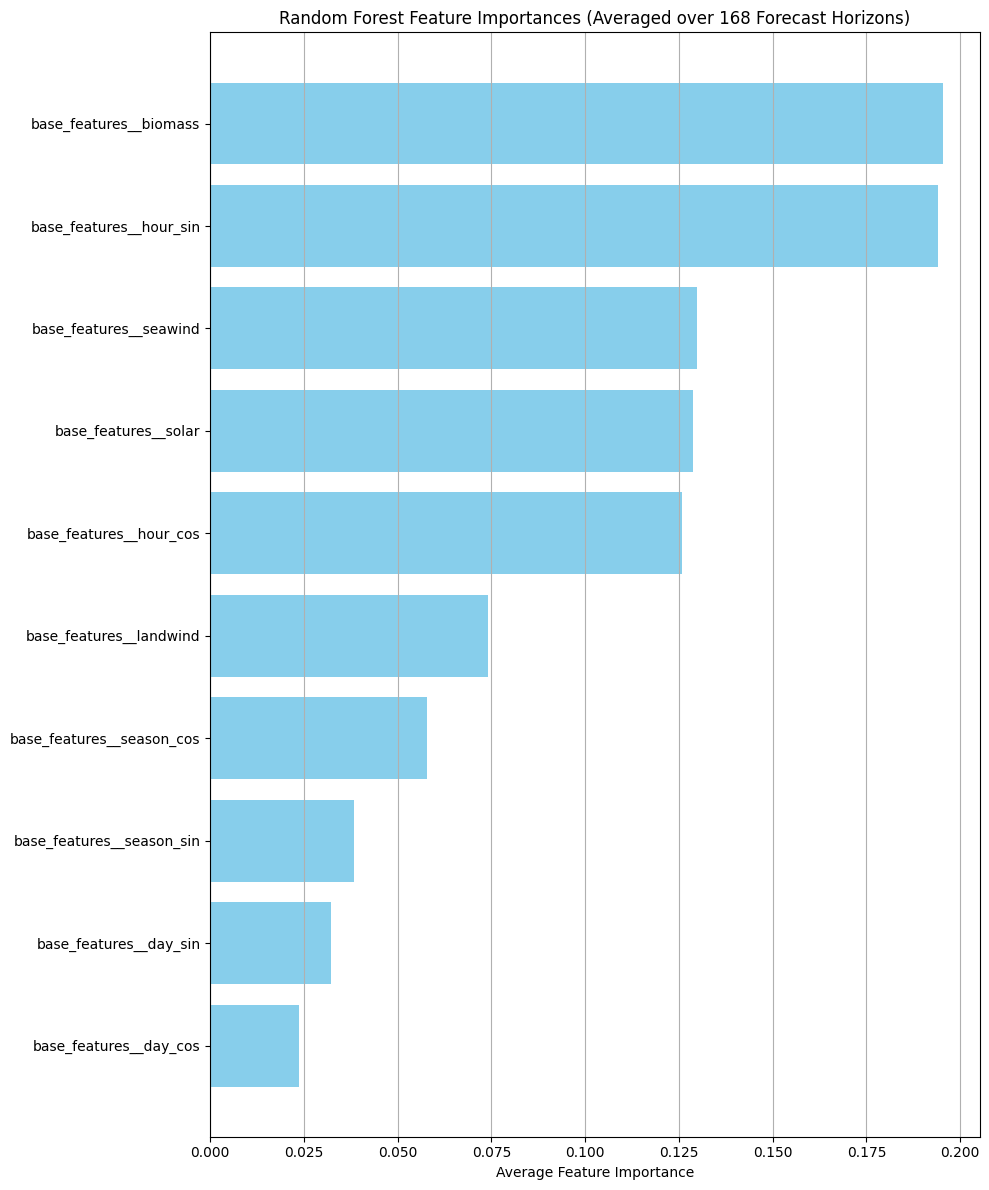

In [81]:
# feature importance insights

# feature names
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# access the fitted multi-output regressor
rf_model = pipeline.named_steps['regressor']

# access individual RandomForest models for each output
importances_list = [est.feature_importances_ for est in rf_model.estimators_]

# Stack into a DataFrame: shape (n_outputs, n_features)
importances_df = pd.DataFrame(importances_list, columns=feature_names)

# Average importances across all forecast horizons (t+1 to t+167)
avg_importance = importances_df.mean(axis=0).sort_values(ascending=True)  # ascending for horizontal bar plot

# Plot
plt.figure(figsize=(10, 12))
plt.barh(avg_importance.index, avg_importance.values, color='skyblue')
plt.xlabel("Average Feature Importance")
plt.title("Random Forest Feature Importances (Averaged over 168 Forecast Horizons)")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

### GRID search to tune hyperparameters ||| Attention! takes 23min to run in my computer!

### the result for 30 and 50,100 is about the same 0.0001 difference in average RMSE 

In [82]:
import itertools


# Define X and Y
X = energy[all_features]
Y = energy[['CO2factor'] + [f'CO2factor_t+{i}' for i in range(1, 168)]]

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('base_features', StandardScaler(), base_features)
    ]
)

# Define parameter grid
param_grid = {
    'n_estimators': [30, 50, 100],
    'max_depth': [10]  # splitting more than 10 levels in each tree deep is not handled due to hardware limitations
}

param_combinations = list(itertools.product(param_grid['n_estimators'], param_grid['max_depth']))

# TimeSeriesSplit for CV
tscv = TimeSeriesSplit(n_splits=3)

# Grid Search
best_score = float('inf')
best_params = None

for n_estimators, max_depth in param_combinations:
    print(f"Trying n_estimators={n_estimators}, max_depth={max_depth}")
    fold_scores = []

    for train_idx, test_idx in tscv.split(X):
        X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
        Y_tr, Y_te = Y.iloc[train_idx], Y.iloc[test_idx]

        # Build pipeline with current parameters
        model = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', MultiOutputRegressor(
                RandomForestRegressor(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    random_state=42,
                    n_jobs=-1
                )
            ))
        ])

        # Fit and predict
        model.fit(X_tr, Y_tr)
        Y_pred = model.predict(X_te)

        # Compute RMSE
        rmse = np.sqrt(mean_squared_error(Y_te, Y_pred))
        fold_scores.append(rmse)

    avg_score = np.mean(fold_scores)
    print(f"Average RMSE: {avg_score:.4f}\n")

    if avg_score < best_score:
        best_score = avg_score
        best_params = (n_estimators, max_depth)

print(f" Best Params: n_estimators={best_params[0]}, max_depth={best_params[1]}")
print(f" Best CV RMSE: {best_score:.4f}")


Trying n_estimators=30, max_depth=10
Average RMSE: 0.0870

Trying n_estimators=50, max_depth=10
Average RMSE: 0.0869

Trying n_estimators=100, max_depth=10
Average RMSE: 0.0868

 Best Params: n_estimators=100, max_depth=10
 Best CV RMSE: 0.0868
